
# Laboratorio 05 --> Clasificación de Malware



Universidad del Valle de Guatemala\
Security Data Science\
Luis Pedro Cuéllar - 18220



### Parte 1 --> Análisis de Paquetes



#### Análisis de Paquetes


In [ ]:
!pip install scapy

     |████████████████████████████████| 1.1 MB 4.3 MB/s 
  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261555 sha256=a24b84d21fd8f6bb4f5cf069da47d0a76daa5daaf4354100f421ca6d0c99b8b0
  Stored in directory: /root/.cache/pip/wheels/b9/6e/c0/0157e466a5e02d3ff28fc7587dff329b4a967a23b3f9b11385
Successfully built scapy


In [ ]:
from scapy.all import * # Packet manipulation
import pandas as pd # Pandas - Create and Manipulate DataFrames
import numpy as np # Math Stuff (don't worry only used for one line :] )
import binascii # Binary to Ascii 
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

**1. Capture 100 paquetes con la herramienta scapy, imprima el tipo de datos, la longitud y el 
contenido del pcap**

In [ ]:
sniffed = sniff(count = 100)

print(type(sniffed))
print(len(sniffed))
print(sniffed)
sniffed[0]

<class 'scapy.plist.PacketList'>
100
<Sniffed: TCP:100 UDP:0 ICMP:0 Other:0>


<Ether  dst=02:42:ac:1c:00:03 src=02:42:ac:1c:00:02 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=772 id=33610 flags=DF frag=0 ttl=64 proto=6 chksum=0x5c6c src=172.28.0.2 dst=172.28.0.3 |<TCP  sport=9000 dport=60272 seq=3675746031 ack=2214514668 dataofs=8 reserved=0 flags=PA window=501 chksum=0x5b34 urgptr=0 options=[('NOP', None), ('NOP', None), ('Timestamp', (2295464169, 39336160))] |<Raw  load='\\x81~\x02\\xcc{"header": {"msg_id": "967cf963-63397333cd78aa0d6cee3c02", "msg_type": "execute_input", "username": "username", "session": "fb3d441e-69b23b0b5da5cf5ad96604ee", "date": "2022-04-09T01:23:14.715049Z", "version": "5.3"}, "msg_id": "967cf963-63397333cd78aa0d6cee3c02", "msg_type": "execute_input", "parent_header": {"msg_id": "e5b3cfc524c042d3c49ce16114048598", "username": "username", "session": "d584081d665e45ef834084790b93da25", "msg_type": "execute_request", "version": "5.0", "date": "2022-04-09T01:23:00.261691Z"}, "metadata": {}, "content": {"code": "sniffed = sniff(count = 100)\\n

In [ ]:
wrpcap("sniffed.pcap", sniffed)

In [ ]:
og_pcap = rdpcap("analisis_paquetes.pcap")
len(og_pcap)

62

**2. Añada al pcap de 100 paquetes el archivo analisis_paquetes.pcap**

Para este inciso, se creó un pcap para no contaminar el archivo "analisis_paquetes.pcap"

In [ ]:
wrpcap("joined_packets.pcap", sniffed, append = True)
wrpcap("joined_packets.pcap", og_pcap, append = True)
new_pcap = rdpcap("joined_packets.pcap")
len(new_pcap)

162

**3. Convierta el pcap a un DataFrame**

Exploramos cómo son los datos que se encuentran en el archivo joined_packets.pcap. Durante esta exploración obtenemos los tipos de datos

In [ ]:
ethernet_frame = new_pcap[0]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload #recupera la informacion de la capa 4

print("Informacion del frame:")
print(ethernet_frame.summary())

print("Informacion del paquete:")
print(ip_packet.summary())

print("Informacion del segmento:")
print(segment.summary())

print("Data:")
print(data.summary())

ethernet_frame.show()
data.show()

Informacion del frame:
Ether / IP / TCP 172.28.0.2:9000 > 172.28.0.3:60272 PA / Raw
Informacion del paquete:
IP / TCP 172.28.0.2:9000 > 172.28.0.3:60272 PA / Raw
Informacion del segmento:
TCP 172.28.0.2:9000 > 172.28.0.3:60272 PA / Raw
Data:
Raw
###[ Ethernet ]### 
  dst       = 02:42:ac:1c:00:03
  src       = 02:42:ac:1c:00:02
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 772
     id        = 33610
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0x5c6c
     src       = 172.28.0.2
     dst       = 172.28.0.3
     \options   \
###[ TCP ]### 
        sport     = 9000
        dport     = 60272
        seq       = 3675746031
        ack       = 2214514668
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 501
        chksum    = 0x5b34
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (2295464169, 39336160))]


In [ ]:
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

# Packets can be filtered on layers ie) ethernet_frame[scapy.layers.l2.Ether]
ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)
print("Ethernet",new_pcap[ethernet_type])
print("IP", new_pcap[ip_type])
print("TCP", new_pcap[tcp_type])

# Scapy provides this via import statements
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP

print("UDP", new_pcap[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.TCP'>
Ethernet <Ether from joined_packets.pcap: TCP:100 UDP:62 ICMP:0 Other:0>
IP <IP from joined_packets.pcap: TCP:100 UDP:62 ICMP:0 Other:0>
TCP <TCP from joined_packets.pcap: TCP:100 UDP:0 ICMP:0 Other:0>
UDP <UDP from joined_packets.pcap: TCP:0 UDP:62 ICMP:0 Other:0>


Hacemos la creación del df a partir del archivo "joined_packets.pcap"

In [ ]:
# Obtenemos los campos de IP/TCP/UDP que seran las columnas de nuestro DF
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

#Concatenamos todos los campos
dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

# Creamos un DF en blanco con los campos como columnas
df = pd.DataFrame(columns=dataframe_fields)
for packet in new_pcap[IP]:
    # Obtenemos los valores de los campos de cada fila
    field_values = []
    # A;adimos todos los valores de los campos de IP al df
    for field in ip_fields:
        if field == 'options':
            # Obtenemos el numero de opciones del IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    # Agregamos el payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    # Agregamos la fila al df
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")

print(df.head(5))

  version ihl tos  len     id flags frag ttl proto chksum  ... dataofs  \
0       4   5   0  772  33610    DF    0  64     6  23660  ...       8   
1       4   5   0   52  43512    DF    0  64     6  14478  ...       8   
2       4   5   0  772  13674    DF    0  64     6  43596  ...       8   
3       4   5   0   52   7237    DF    0  64     6  50753  ...       8   
4       4   5   0  462  26991    DF    0  64     6  30591  ...       8   

  reserved flags window chksum urgptr options payload  \
0        0    PA    501  23348      0       3     720   
1        0     A    501  22628      0       3       0   
2        0    PA    501  23348      0       3     720   
3        0     A    501  22628      0       3       0   
4        0    PA    501  23036      0       3     410   

                                         payload_raw  \
0  b'\x81~\x02\xcc{"header": {"msg_id": "967cf963...   
1                                                b''   
2  b'\x81~\x02\xcc{"header": {"msg_id": "967

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   version      162 non-null    object
 1   ihl          162 non-null    object
 2   tos          162 non-null    object
 3   len          162 non-null    object
 4   id           162 non-null    object
 5   flags        162 non-null    object
 6   frag         162 non-null    object
 7   ttl          162 non-null    object
 8   proto        162 non-null    object
 9   chksum       162 non-null    object
 10  src          162 non-null    object
 11  dst          162 non-null    object
 12  options      162 non-null    object
 13  time         162 non-null    object
 14  sport        162 non-null    object
 15  dport        162 non-null    object
 16  seq          100 non-null    object
 17  ack          100 non-null    object
 18  dataofs      100 non-null    object
 19  reserved     100 non-null    

**4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port**

In [ ]:
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,172.28.0.2,172.28.0.1,8080,56274
1,172.28.0.1,172.28.0.2,56274,8080
2,172.28.0.3,172.28.0.2,54862,9000
3,172.28.0.2,172.28.0.3,9000,54862
4,172.28.0.3,172.28.0.2,54862,9000
...,...,...,...,...
157,84.54.22.33,10.1.10.53,53,53
158,10.1.10.53,84.54.22.33,53,53
159,84.54.22.33,10.1.10.53,53,53
160,10.1.10.53,84.54.22.33,53,53


**5. Estadísticas**

> **a. Muestre cual es la IP origen que más aparece**

In [ ]:
df['src'].describe()

count            162
unique             6
top       172.28.0.2
freq              44
Name: src, dtype: object

In [ ]:
frqnt_src_address = df['src'].mode()
frqnt_src_address

0    172.28.0.2
dtype: object

> **b. Muestre cual es la IP origen que más aparece**

In [ ]:
df['dst'].describe()

count            162
unique             6
top       172.28.0.2
freq              56
Name: dst, dtype: object

In [ ]:
frqnt_dst_address = df['dst'].mode()
frqnt_dst_address

0    172.28.0.2
dtype: object

> **c. ¿A qué IPs se comunica la IP del inciso a?**

In [ ]:
df[df.src == df["src"].mode()[0]]['dst'].describe()

count             44
unique             2
top       172.28.0.1
freq              30
Name: dst, dtype: object

In [ ]:
df[df.src == df["src"].mode()[0]]['dst'].unique()

array(['172.28.0.1', '172.28.0.3'], dtype=object)

> **d. A qué puertos destino se comunica la IP del inciso a?** 

In [ ]:
df[df.src == df["src"].mode()[0]]['dport'].describe()

count        44
unique        7
top       56274
freq         14
Name: dport, dtype: int64

In [ ]:
df[df.src == df["src"].mode()[0]]['dport'].unique()

array([56274, 54862, 6000, 56392, 54806, 56432, 56440], dtype=object)

> **e. ¿A qué puertos origen se comunica la IP del inciso a?** 

In [ ]:
df[df.src == df["src"].mode()[0]]['sport'].describe()

count       44
unique       5
top       8080
freq        30
Name: sport, dtype: int64

In [ ]:
df[df.src == df["src"].mode()[0]]['sport'].unique()

array([8080, 9000, 51142, 55240, 55246], dtype=object)

> **f. ¿Para que se utiliza el puerto que más aparece en el inciso  d y e?**

In [ ]:
frqnt_sport = df[df.src == df["src"].mode()[0]]['sport'].mode()[0]
frqnt_dport = df[df.src == df["src"].mode()[0]]['dport'].mode()[0]

print(frqnt_sport, frqnt_dport)

8080 56274


In [ ]:
##  PENDIENTE VER PARA QUÉ SIRVEN ESOS PUERTOS

**6. Gráficas**

> **a. Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads 
enviados de dichas direcciones.**

In [ ]:
src_count = df['src'].value_counts()
src_count = src_count.to_frame().reset_index()
src_count

,index,src
0,172.28.0.2,44
1,172.28.0.1,39
2,10.1.10.53,31
3,84.54.22.33,29
4,172.28.0.3,17
5,75.75.75.75,2


In [ ]:
src_count.rename(
    columns = {
        "index" : "ip",
        "src" : "count"
    },
    inplace = True
)
src_count

,ip,count
0,172.28.0.2,44
1,172.28.0.1,39
2,10.1.10.53,31
3,84.54.22.33,29
4,172.28.0.3,17
5,75.75.75.75,2


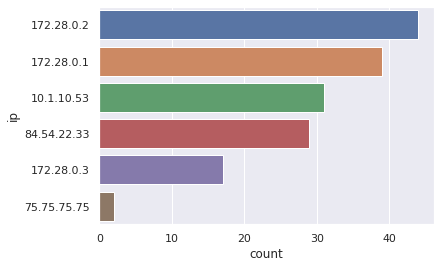

In [ ]:
ax = sns.barplot(
  x = "count",
  y = "ip", 
  data = src_count
)

> **b. Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads 
recibidos en dichas direcciones.**

In [ ]:
dst_count = df['dst'].value_counts()
dst_count = dst_count.to_frame().reset_index()
dst_count

,index,dst
0,172.28.0.2,56
1,10.1.10.53,31
2,172.28.0.1,30
3,84.54.22.33,29
4,172.28.0.3,14
5,75.75.75.75,2


In [ ]:
dst_count.rename(
    columns = {
        "index" : "ip",
        "dst" : "count"
    },
    inplace = True
)
dst_count

,ip,count
0,172.28.0.2,56
1,10.1.10.53,31
2,172.28.0.1,30
3,84.54.22.33,29
4,172.28.0.3,14
5,75.75.75.75,2


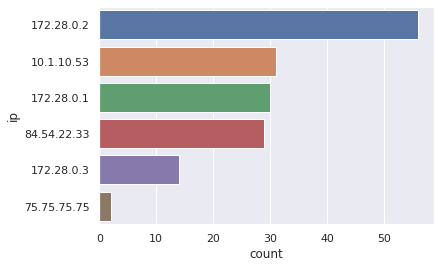

In [ ]:
ax = sns.barplot(
  x = "count",
  y = "ip", 
  data = dst_count
)

> **c. Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los 
payloads enviados de dichos puertos.**

In [ ]:
sport_count = df['sport'].value_counts()
sport_count = sport_count.to_frame().reset_index()
sport_count

,index,sport
0,53,60
1,8080,30
2,56274,15
3,56392,13
4,6000,11
5,56432,6
6,55240,5
7,55246,5
8,56440,5
9,54806,4


In [ ]:
sport_count.rename(
    columns = {
        "index" : "port",
        "sport" : "count"
    },
    inplace = True
)
sport_count

,port,count
0,53,60
1,8080,30
2,56274,15
3,56392,13
4,6000,11
5,56432,6
6,55240,5
7,55246,5
8,56440,5
9,54806,4


In [ ]:
sport_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   port    15 non-null     int64
 1   count   15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [ ]:
sport_count["port"] = sport_count["port"].apply(str)
sport_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   port    15 non-null     object
 1   count   15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


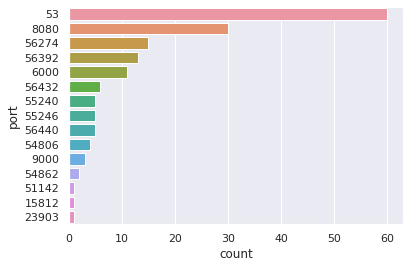

In [ ]:
ax = sns.barplot(
  x = "count",
  y = "port", 
  data = sport_count
)

> **d. Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los 
payloads recibidos en dichos puertos.**

In [ ]:
dport_count = df['dport'].value_counts()
dport_count = dport_count.to_frame().reset_index()
dport_count

,index,dport
0,53,60
1,8080,39
2,56274,14
3,6000,11
4,56392,8
5,9000,6
6,55240,5
7,55246,5
8,56432,4
9,56440,4


In [ ]:
dport_count.rename(
    columns = {
        "index" : "port",
        "dport" : "count"
    },
    inplace = True
)
dport_count

,port,count
0,53,60
1,8080,39
2,56274,14
3,6000,11
4,56392,8
5,9000,6
6,55240,5
7,55246,5
8,56432,4
9,56440,4


In [ ]:
dport_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   port    15 non-null     int64
 1   count   15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [ ]:
dport_count["port"] = dport_count["port"].apply(str)
dport_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   port    15 non-null     object
 1   count   15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


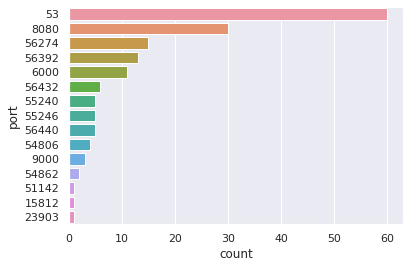

In [ ]:
ax = sns.barplot(
  x = "count",
  y = "port", 
  data = sport_count
)

**7. Investigación del payload**

> **a. Cree un nuevo DF que incluya únicamente la conversación de la dirección IP origen 
más frecuente**

In [ ]:
fqnt_src = df.loc[df["src"] == "172.28.0.2"]
fqnt_src.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,772,33610,DF,0,64,6,23660,...,8,0,PA,501,23348,0,3,720,"b'\x81~\x02\xcc{""header"": {""msg_id"": ""967cf963...",b'817e02cc7b22686561646572223a207b226d73675f69...
3,4,5,0,52,7237,DF,0,64,6,50753,...,8,0,A,501,22628,0,3,0,b'',b''
5,4,5,0,1283,32842,DF,0,64,6,23919,...,8,0,PA,501,23857,0,3,1231,b'HTTP/1.1 200 OK\r\nContent-Type: text/plain;...,b'485454502f312e3120323030204f4b0d0a436f6e7465...
9,4,5,0,52,32843,DF,0,64,6,25149,...,8,0,A,501,22626,0,3,0,b'',b''
10,4,5,0,337,32844,DF,0,64,6,24863,...,8,0,PA,501,22911,0,3,285,b'HTTP/1.1 200 OK\r\nContent-Type: text/html\r...,b'485454502f312e3120323030204f4b0d0a436f6e7465...


> **b. Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por 
payload**

In [61]:
srcs = fqnt_src[['src', 'dst', 'payload']]
payload_gb = srcs.groupby("payload")
payload_gb.head()

,src,dst,payload
0,172.28.0.2,172.28.0.3,720
3,172.28.0.2,172.28.0.3,0
5,172.28.0.2,172.28.0.1,1231
9,172.28.0.2,172.28.0.1,0
10,172.28.0.2,172.28.0.1,285
13,172.28.0.2,172.28.0.1,1102
17,172.28.0.2,172.28.0.1,0
18,172.28.0.2,172.28.0.1,285
20,172.28.0.2,172.28.0.3,404
23,172.28.0.2,172.28.0.3,0


> **c. Obtenga la IP que más ha intercambiado bytes con la IP más frecuente.  Esta IP es 
sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.**

In [70]:
sketchy_dst_ip = srcs[srcs.payload == srcs.payload.max()].iloc[0,1]
sketchy_dst_ip

'172.28.0.1'

> **d. Cree un nuevo DF con la conversación entre la IP más frecuenta y la IP sospechosa.**


In [71]:
sketchy_conv = srcs[srcs.payload == srcs.payload.max()]
sketchy_conv

,src,dst,payload
33,172.28.0.2,172.28.0.1,1340
